In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

from matplotlib import pyplot as plt

import warnings
from scipy import stats

In [3]:
import pprint
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

from matplotlib import pyplot as plt

import warnings
from scipy import stats

In [4]:
from sim_analysis import (
    read_gene_ranges,
    get_sim_runs,
    get_config,
    get_simid,
    get_r_hmrf_loglikelihood,
    get_best_r_hmrf,
    get_true_clones,
    get_calico_clones,
    get_starch_clones,
    get_numbat_clones,
    plot_clones,
    get_cna_seglevel,
    read_calico_gene_cna,
    read_true_cna,
    read_true_gene_cna,
    plot_rdr_baf,
    get_clone_aris,
    plot_clone_aris,
    get_truth_cna_file,
    get_cna_f1s,
    plot_cna_f1s,
    get_sim_run_generator,
    read_numbat_gene_cna,
    get_numbat_cna_file,
    map_unique_entries,
    copies_to_rdrbaf,
    configure_warnings,
    get_calicost_results
)

## Configuration

In [5]:
configure_warnings()

In [6]:
sns.set(font='Arial')

pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.float_format', lambda x: '%.6e' % x)

plt.rcParams.update({'font.size': 14})

In [7]:
true_dir = "../simulated_data_related"
calico_pure_dir = "../nomixing_calicost_related"
numbat_dir = "../numbat_related"
starch_dir = "../starch_related"

calico_repo_dir = "/Users/mw9568/Work/ragr/CalicoST/"

### Available Runs

Summary table on the available simulations and the corresponding (per-seed) calicoST results

In [8]:
sim_runs = get_sim_runs(calico_dir=calico_pure_dir)
sim_runs

TypeError: get_sim_runs() got an unexpected keyword argument 'calico_dir'

### Config for a given run

In [39]:
# NB {2: numbat clones plot}.
sim_seed = 0
run = sim_runs[["cnas", "cna_size", "ploidy", "random"]].iloc[sim_seed].values

# NB seed used to initialize starting clones.
calicost_seed = 0
best_initialization = get_best_r_hmrf(calico_pure_dir, *run)

print(f"Found best initialization {best_initialization}")

# config = get_config(calico_pure_dir, *run, calicost_seed, verbose=True)

Found best initialization 1


In [40]:
run

array([(1, 2), '1e7', 2, 0], dtype=object)

In [41]:
true_clones = get_true_clones(true_dir, *run)
calico_clones = [get_calico_clones(calico_pure_dir, *run, seed, true_dir=true_dir) for seed in range(5)]
starch_clones = get_starch_clones(starch_dir, *run, true_clones=true_clones)
numbat_clones = get_numbat_clones(numbat_dir, *run, true_clones=true_clones)

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1355: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random0/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")


/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1178: UserWarning: No clones to plot.
  warnings.warn("No clones to plot.")


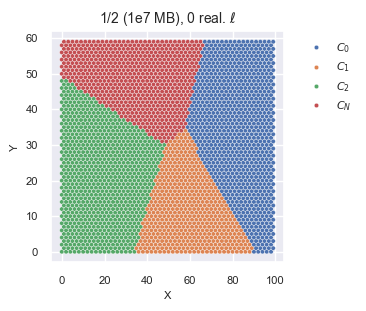

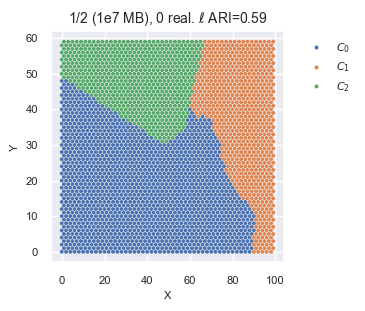

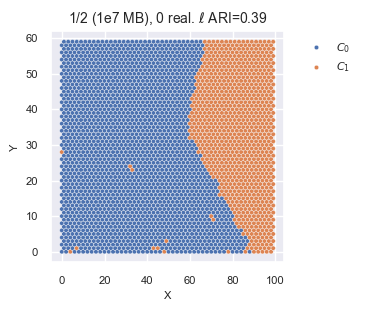

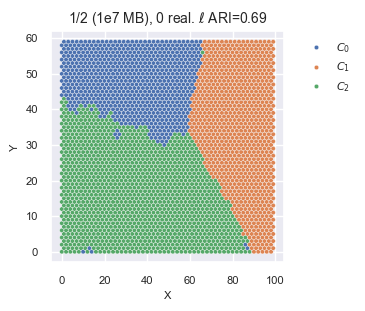

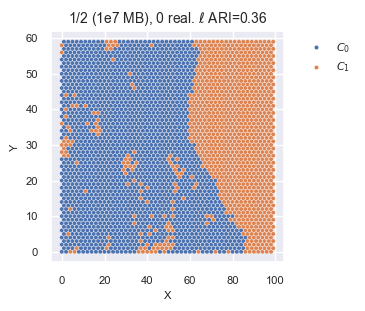

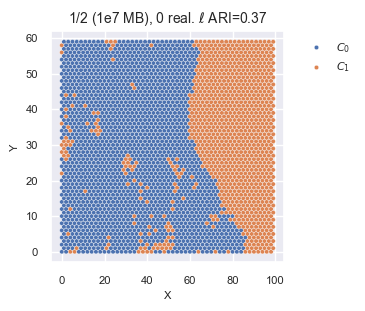

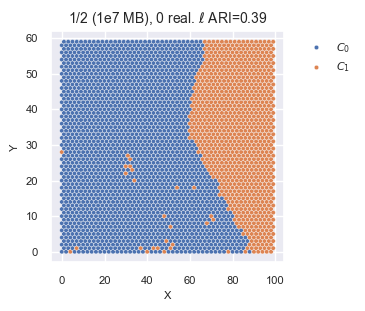

In [42]:
_ = plot_clones(true_clones, *run, column="true_clone")
_ = plot_clones(starch_clones, *run)
_ = plot_clones(numbat_clones, *run)

for seed in range(5):
    _ = plot_clones(calico_clones[seed], *run, column="est_clone")

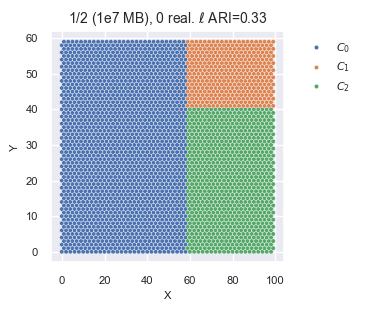

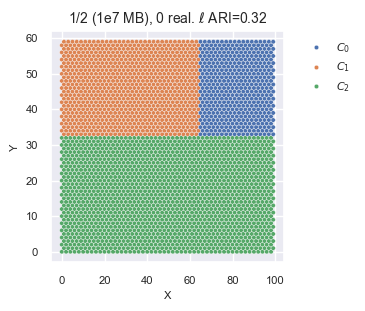

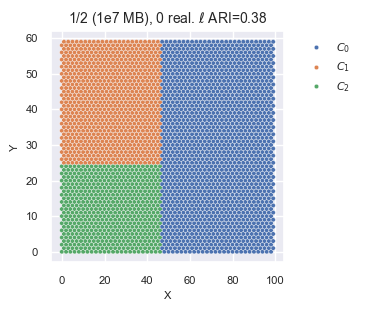

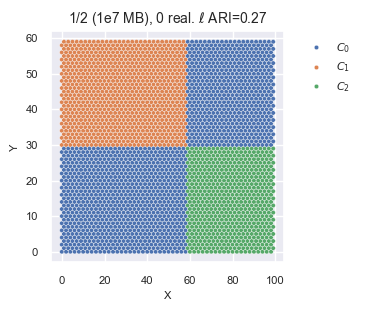

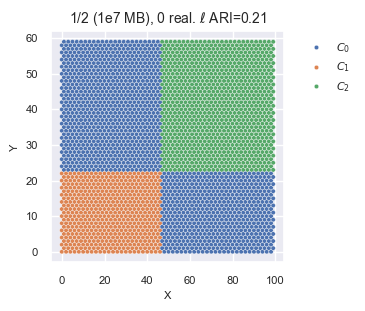

In [43]:
for seed in range(5):
    _ = plot_clones(calico_clones[seed], *run, column="initial_clone")

In [13]:
true_cna = read_true_cna(
    true_dir,
    *run,
    non_neutral_only=True
)
true_cna

chr      start        end  A_copy  B_copy cna_gtype cna_ctype  cna_id
clone                                                                         
clone_0    2   29801381   79801381       2       0       2|0     CNLOH       6
clone_0    3  130584522  180584522       2       1       2|1       AMP       3
clone_0   10    9540020   59540020       3       1       3|1       AMP       0
clone_0   10   24940472   74940472       2       0       2|0     CNLOH       5
clone_0   10   45210333   95210333       0       1       0|1       DEL       2
clone_0   15   12989752   62989752       0       1       0|1       DEL       7
clone_0   17   25399034   75399034       0       1       0|1       DEL       1
clone_0   17   29191821   79191821       3       1       3|1       AMP       8
clone_0   19    6822162   56822162       1       2       1|2       AMP       4
clone_1    3  130584522  180584522       2       1       2|1       AMP       3
clone_1    7    9002280   59002280       0       2       0|2     CNLOH      10
clone_1   10    9540020   59540020       3       1       3|1       AMP       0
clone_1   10   22203101   72203101       1       3       1|3       AMP       9
clone_1   10   24940472   74940472       2       0       2|0     CNLOH       5
clone_1   10   45210333   95210333       0       1       0|1       DEL       2
clone_1   12   82684090  132684090       0       1       0|1       DEL      11
clone_1   17   25399034   75399034       0       1       0|1       DEL       1
clone_1   19    6822162   56822162       1       2       1|2       AMP       4
clone_2    3  130584522  180584522       2       1       2|1       AMP       3
clone_2    9   16406931   66406931       2       1       2|1       AMP      14
clone_2   10    9540020   59540020       3       1       3|1       AMP       0
clone_2   10   24940472   74940472       2       0       2|0     CNLOH       5
clone_2   10   45210333   95210333       0       1       0|1       DEL       2
clone_2   13    9170671   59170671       0       2       0|2     CNLOH      13
clone_2   17   25399034   75399034       0       1       0|1       DEL       1
clone_2   19     117176   50117176       0       1       0|1       DEL      12
clone_2   19    6822162   56822162       1       2       1|2       AMP       4

In [14]:
true_gene_cna = read_true_gene_cna(
    true_dir,
    *run,
    read_gene_ranges(calico_repo_dir),
    non_neutral_only=True,
)
true_gene_cna

chr     start       end  clone0 a  clone0 b clone0_gtype clone0_ctype  clone1 a  clone1 b clone1_gtype clone1_ctype  clone2 a  clone2 b clone2_gtype clone2_ctype
gene                                                                                                                                                                         
ALK           2  29192774  29921586         2         0          2|0        CNLOH         1         1          1|1          NEU         1         1          1|1          NEU
AC016907.2    2  29841187  30143804         2         0          2|0        CNLOH         1         1          1|1          NEU         1         1          1|1          NEU
AC106870.2    2  29890371  29892354         2         0          2|0        CNLOH         1         1          1|1          NEU         1         1          1|1          NEU
AC106870.1    2  29899597  29907199         2         0          2|0        CNLOH         1         1          1|1          NEU         1         1          1|1          NEU
YPEL5         2  30146941  30160533         2         0          2|0        CNLOH         1         1          1|1          NEU         1         1          1|1          NEU
...         ...       ...       ...       ...       ...          ...          ...       ...       ...          ...          ...       ...       ...          ...          ...
SMIM17       19  56643159  56657247         1         2          1|2          AMP         1         2          1|2          AMP         1         2          1|2          AMP
ZNF835       19  56661980  56671783         1         2          1|2          AMP         1         2          1|2          AMP         1         2          1|2          AMP
AC006115.2   19  56669941  56823395         1         2          1|2          AMP         1         2          1|2          AMP         1         2          1|2          AMP
ZIM2         19  56774547  56840729         1         2          1|2          AMP         1         2          1|2          AMP         1         2          1|2          AMP
PEG3         19  56810077  56840728         1         2          1|2          AMP         1         2          1|2          AMP         1         2          1|2          AMP

[7435 rows x 15 columns]

In [15]:
calico_gene_cna = read_calico_gene_cna(
    calico_pure_dir, *run, calicost_seed, non_neutral_only=True, calico_repo_dir=calico_repo_dir
)
calico_gene_cna

chr     start       end  clone0 a  clone0 b  clone1 a  clone1 b  clone2 a  clone2 b  clone3 a  clone3 b clone0_gtype clone0_ctype clone1_gtype clone1_ctype clone2_gtype clone2_ctype clone3_gtype clone3_ctype
gene                                                                                                                                                                                                                       
THUMPD2       2  39736060  39779267         1         1         1         1         1         1         0         2          1|1          NEU          1|1          NEU          1|1          NEU          0|2        CNLOH
SLC8A1        2  40097270  40611053         1         1         1         1         1         1         0         2          1|1          NEU          1|1          NEU          1|1          NEU          0|2        CNLOH
EML4          2  42169353  42332548         1         1         1         1         1         1         0         2          1|1          NEU          1|1          NEU          1|1          NEU          0|2        CNLOH
CAMKMT        2  44361947  44772592         1         1         1         1         1         1         0         2          1|1          NEU          1|1          NEU          1|1          NEU          0|2        CNLOH
SRBD1         2  45388680  45612165         1         1         1         1         1         1         0         2          1|1          NEU          1|1          NEU          1|1          NEU          0|2        CNLOH
...         ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...          ...          ...          ...          ...          ...          ...          ...          ...
EDDM13       19  56272748  56310454         1         1         1         2         1         2         1         2          1|1          NEU          1|2          AMP          1|2          AMP          1|2          AMP
AC006116.4   19  56387412  56388424         1         1         1         1         1         2         1         1          1|1          NEU          1|1          NEU          1|2          AMP          1|1          NEU
ZNF667-AS1   19  56477250  56504362         1         1         1         1         1         2         1         1          1|1          NEU          1|1          NEU          1|2          AMP          1|1          NEU
ZNF71        19  56595264  56626481         1         1         1         1         1         2         1         1          1|1          NEU          1|1          NEU          1|2          AMP          1|1          NEU
ZNF264       19  57191500  57222846         1         1         1         1         1         2         1         1          1|1          NEU          1|1          NEU          1|2          AMP          1|1          NEU

[897 rows x 19 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:432: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:432: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:432: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:432: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],


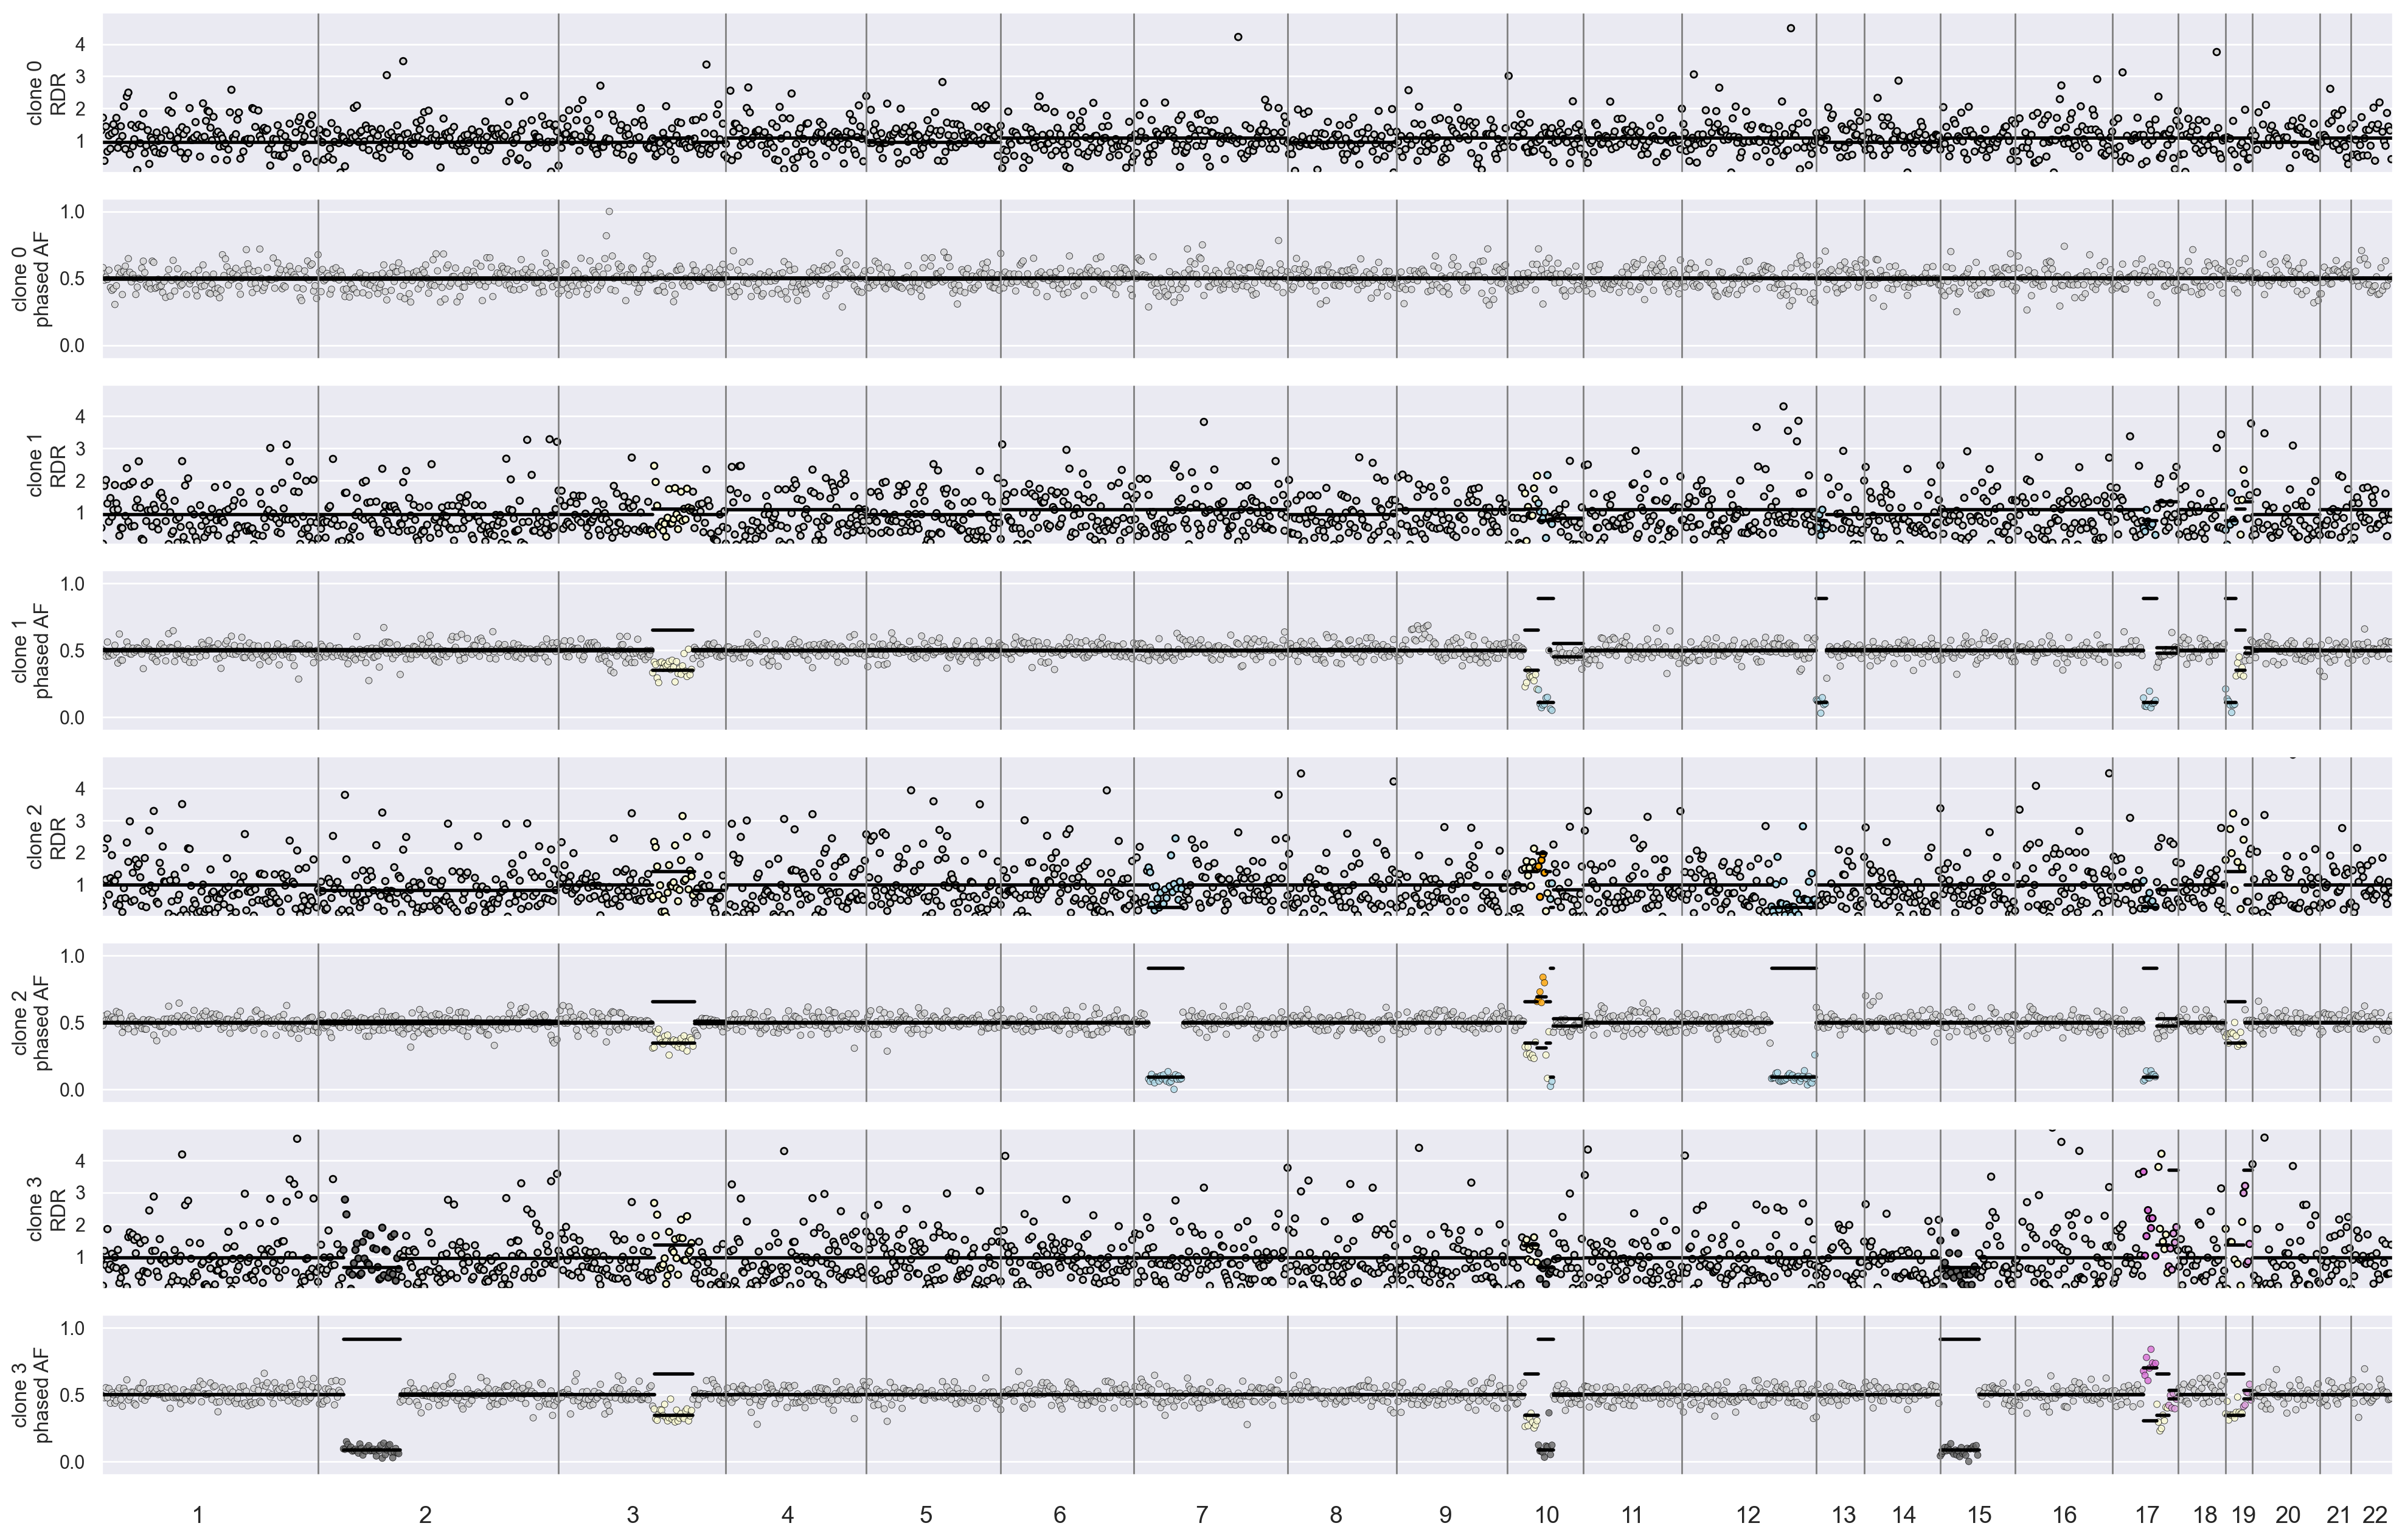

In [16]:
_ = plot_rdr_baf(calico_pure_dir, *run, best_initialization)

In [31]:
# allspots = get_calicost_results(calico_pure_dir, *run, best_initialization, "allspots_nstates7_sp.npz")
# list(allspots.keys()) # ["round-1_assignment"]

# calico_clones[0]["initial_clone"] = allspots["round-1_assignment"]
# calico_clones[0]

# plot_clones(numbat_clones, *run)

calico_clones[0]

est_clone true_clone   x   y  initial_clone
spot                                             
0             0          N   0   0              0
1             0          N   0   2              0
2             0          N   0   4              0
3             0          N   0   6              0
4             0          N   0   8              0
...         ...        ...  ..  ..            ...
2995          2          1  99  51              1
2996          2          1  99  53              1
2997          2          1  99  55              1
2998          2          1  99  57              1
2999          2          1  99  59              1

[3000 rows x 5 columns]

# Clone identification accuracy

In [17]:
clone_aris = get_clone_aris(true_dir, calico_pure_dir, numbat_dir, starch_dir)

# NB best CalicoST clones only; 90 sims X 3 methods.
# assert len(clone_aris) == 270

# NB 90 sims X 3 methods x # of available realizations.
clone_aris[(clone_aris["method_best"] == 1)].reset_index(drop=True)

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1347: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random0/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1347: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random1/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1347: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random4/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1347: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random9/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:241: UserWarning: ../nomixing_calicost_related/numc

simid    cnas  n_cnas cna_size  ploidy  random                                   true_clones_path    method                                        clones_path       recall          ari  method_best  calicost_seed  calicost_log_likelihood
0    numcnas3.3_cnasize5e7_ploidy2_random5  (3, 3)       6     50Mb       2       5  ../simulated_data_related/numcnas3.3_cnasize5e...    Starch  ../starch_related/numcnas3.3_cnasize5e7_ploidy... 9.913250e-01 9.882429e-01            1            NaN                      NaN
1    numcnas6.3_cnasize5e7_ploidy2_random4  (6, 3)       9     50Mb       2       4  ../simulated_data_related/numcnas6.3_cnasize5e...  CalicoST  ../nomixing_calicost_related/numcnas6.3_cnasiz... 9.869953e-01 9.806157e-01            1   0.000000e+00            -6.380612e+06
2    numcnas6.3_cnasize5e7_ploidy2_random6  (6, 3)       9     50Mb       2       6  ../simulated_data_related/numcnas6.3_cnasize5e...  CalicoST  ../nomixing_calicost_related/numcnas6.3_cnasiz... 9.835573e-01 9.793326e-01            1   0.000000e+00            -6.803500e+06
3    numcnas1.2_cnasize5e7_ploidy2_random8  (1, 2)       3     50Mb       2       8  ../simulated_data_related/numcnas1.2_cnasize5e...  CalicoST  ../nomixing_calicost_related/numcnas1.2_cnasiz... 9.838565e-01 9.785140e-01            1   1.000000e+00            -6.860774e+06
4    numcnas6.3_cnasize5e7_ploidy2_random8  (6, 3)       9     50Mb       2       8  ../simulated_data_related/numcnas6.3_cnasize5e...  CalicoST  ../nomixing_calicost_related/numcnas6.3_cnasiz... 9.857120e-01 9.769140e-01            1   3.000000e+00            -6.592399e+06
..                                     ...     ...     ...      ...     ...     ...                                                ...       ...                                                ...          ...          ...          ...            ...                      ...
265  numcnas3.3_cnasize1e7_ploidy2_random9  (3, 3)       6     10Mb       2       9  ../simulated_data_related/numcnas3.3_cnasize1e...    Numbat  ../numbat_related/numcnas3.3_cnasize1e7_ploidy... 0.000000e+00 0.000000e+00            1            NaN                      NaN
266  numcnas3.3_cnasize1e7_ploidy2_random7  (3, 3)       6     10Mb       2       7  ../simulated_data_related/numcnas3.3_cnasize1e...    Numbat  ../numbat_related/numcnas3.3_cnasize1e7_ploidy... 0.000000e+00 0.000000e+00            1            NaN                      NaN
267  numcnas1.2_cnasize3e7_ploidy2_random5  (1, 2)       3     30Mb       2       5  ../simulated_data_related/numcnas1.2_cnasize3e...    Numbat  ../numbat_related/numcnas1.2_cnasize3e7_ploidy... 0.000000e+00 0.000000e+00            1            NaN                      NaN
268  numcnas1.2_cnasize1e7_ploidy2_random9  (1, 2)       3     10Mb       2       9  ../simulated_data_related/numcnas1.2_cnasize1e...    Numbat  ../numbat_related/numcnas1.2_cnasize1e7_ploidy... 0.000000e+00 0.000000e+00            1            NaN                      NaN
269  numcnas1.2_cnasize1e7_ploidy2_random0  (1, 2)       3     10Mb       2       0  ../simulated_data_related/numcnas1.2_cnasize1e...    Numbat  ../numbat_related/numcnas1.2_cnasize1e7_ploidy... 0.000000e+00 0.000000e+00            1            NaN                      NaN

[270 rows x 14 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1600: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


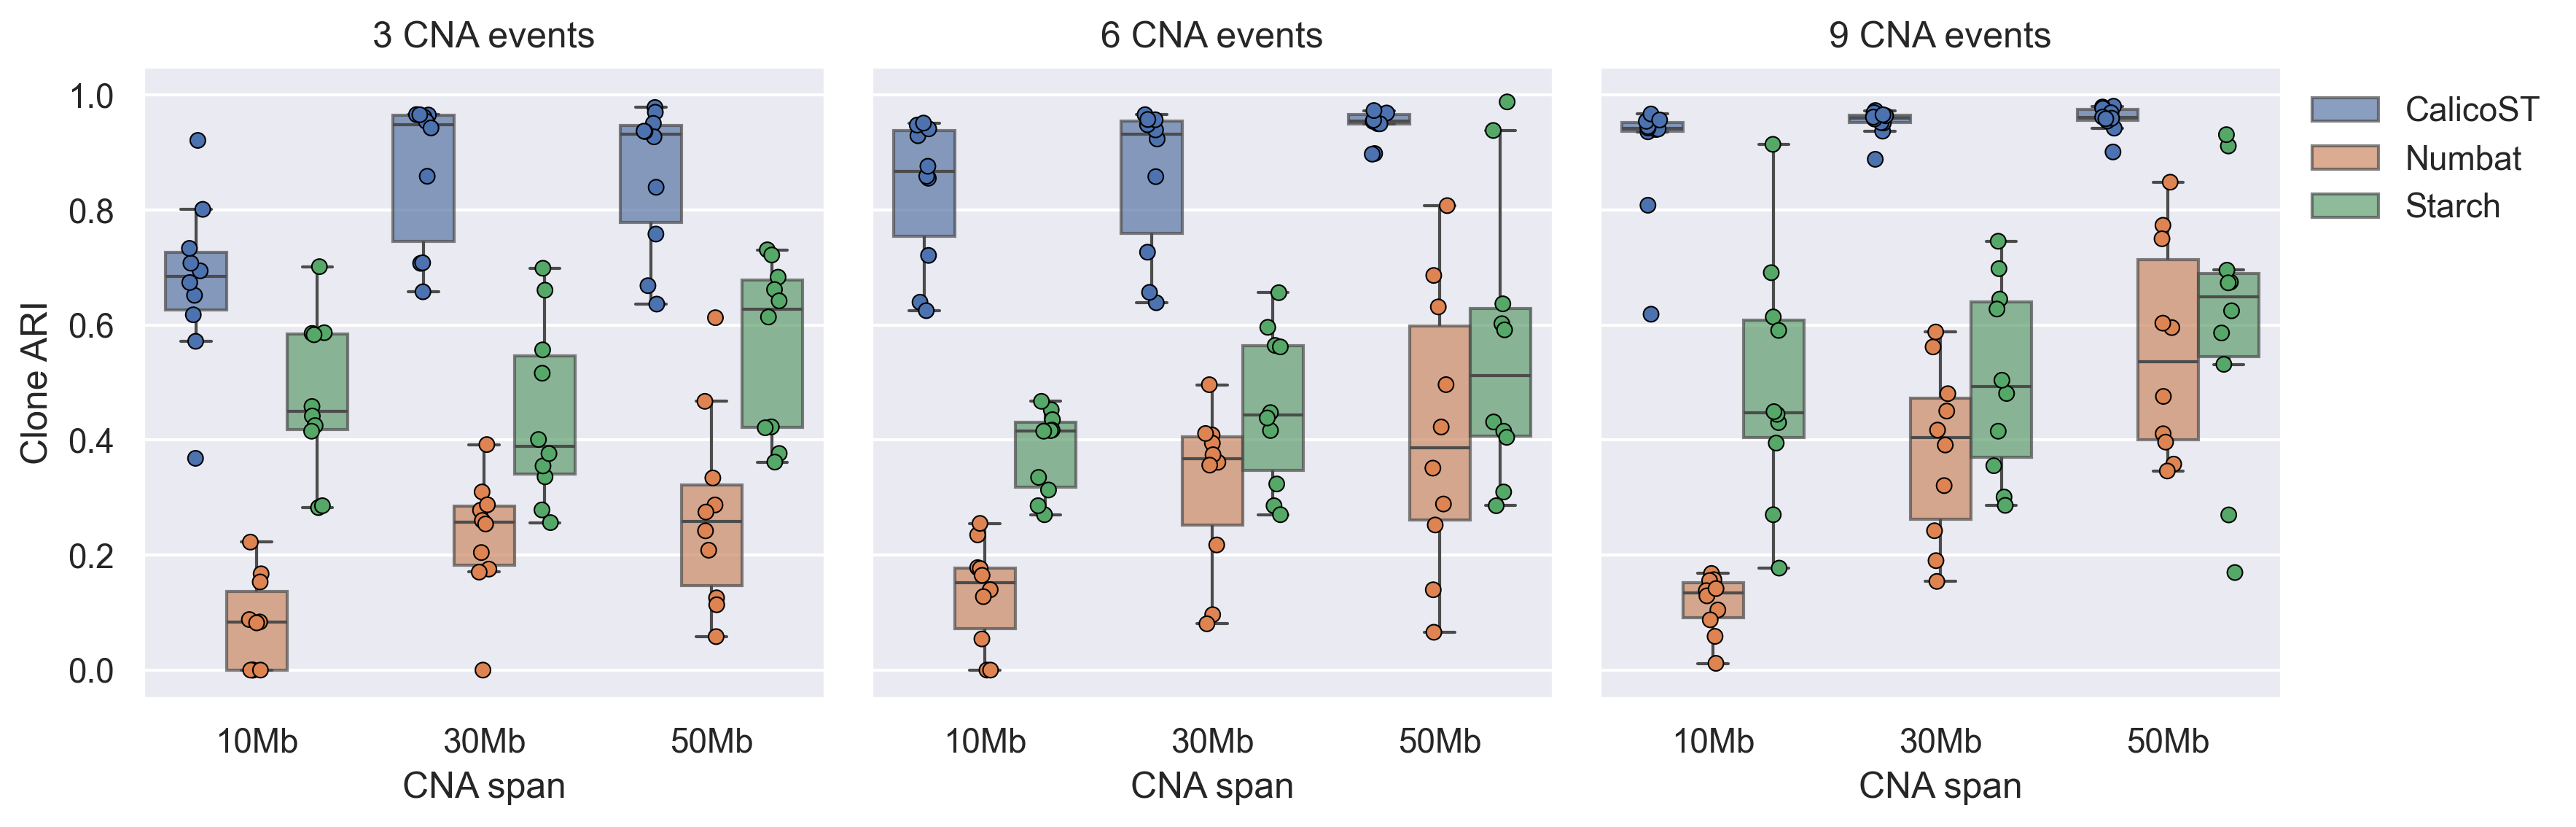

In [18]:
plot_clone_aris(clone_aris[(clone_aris["method_best"] == 1)])

# Event detection accuracy

The detection accuracy is evalated on a per-gene level:
the precision & sensitivity of genes involved in each category of event (Deletion, Amplication, LOH) for all events.

In [19]:
cna_f1s = get_cna_f1s(calico_repo_dir, true_dir, calico_pure_dir, numbat_dir, starch_dir)

# NB best CalicoST clones only; 90 sims X 3 methods X 4 types (DEL, AMP, CNLOH, ALL).
assert len(cna_f1s) == 1_080

columns = ["cnas", "n_cnas", "cna_size", "random", "method", "F1", "precision", "recall"]
cna_f1s[columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:241: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize3e7_ploidy2_random0/clone3_rectangle0_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  warnings.warn(f"{rdrbaf_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:241: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize3e7_ploidy2_random2/clone3_rectangle2_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  warnings.warn(f"{rdrbaf_path} does not exist.")


cnas  n_cnas cna_size  random    method           F1    precision       recall
0     (1, 2)       3     10Mb       0  CalicoST 3.783784e-01 1.000000e+00 2.333333e-01
1     (1, 2)       3     10Mb       0  CalicoST 1.157556e-01 6.143345e-02 1.000000e+00
2     (1, 2)       3     10Mb       0  CalicoST 7.906977e-01 6.891892e-01 9.272727e-01
3     (1, 2)       3     10Mb       0  CalicoST 2.192513e-01 1.290661e-01 7.278107e-01
4     (1, 2)       3     10Mb       0    Numbat 0.000000e+00 0.000000e+00 0.000000e+00
...      ...     ...      ...     ...       ...          ...          ...          ...
1075  (6, 3)       9     50Mb       9    Numbat 8.639922e-01 9.966140e-01 7.625216e-01
1076  (6, 3)       9     50Mb       9    Starch 1.796200e-01 1.017613e-01 7.647059e-01
1077  (6, 3)       9     50Mb       9    Starch 0.000000e+00 0.000000e+00 0.000000e+00
1078  (6, 3)       9     50Mb       9    Starch 0.000000e+00 0.000000e+00 0.000000e+00
1079  (6, 3)       9     50Mb       9    Starch 3.032787e-01 2.007233e-01 6.201117e-01

[1080 rows x 8 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1768: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1768: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1768: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1768: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xti

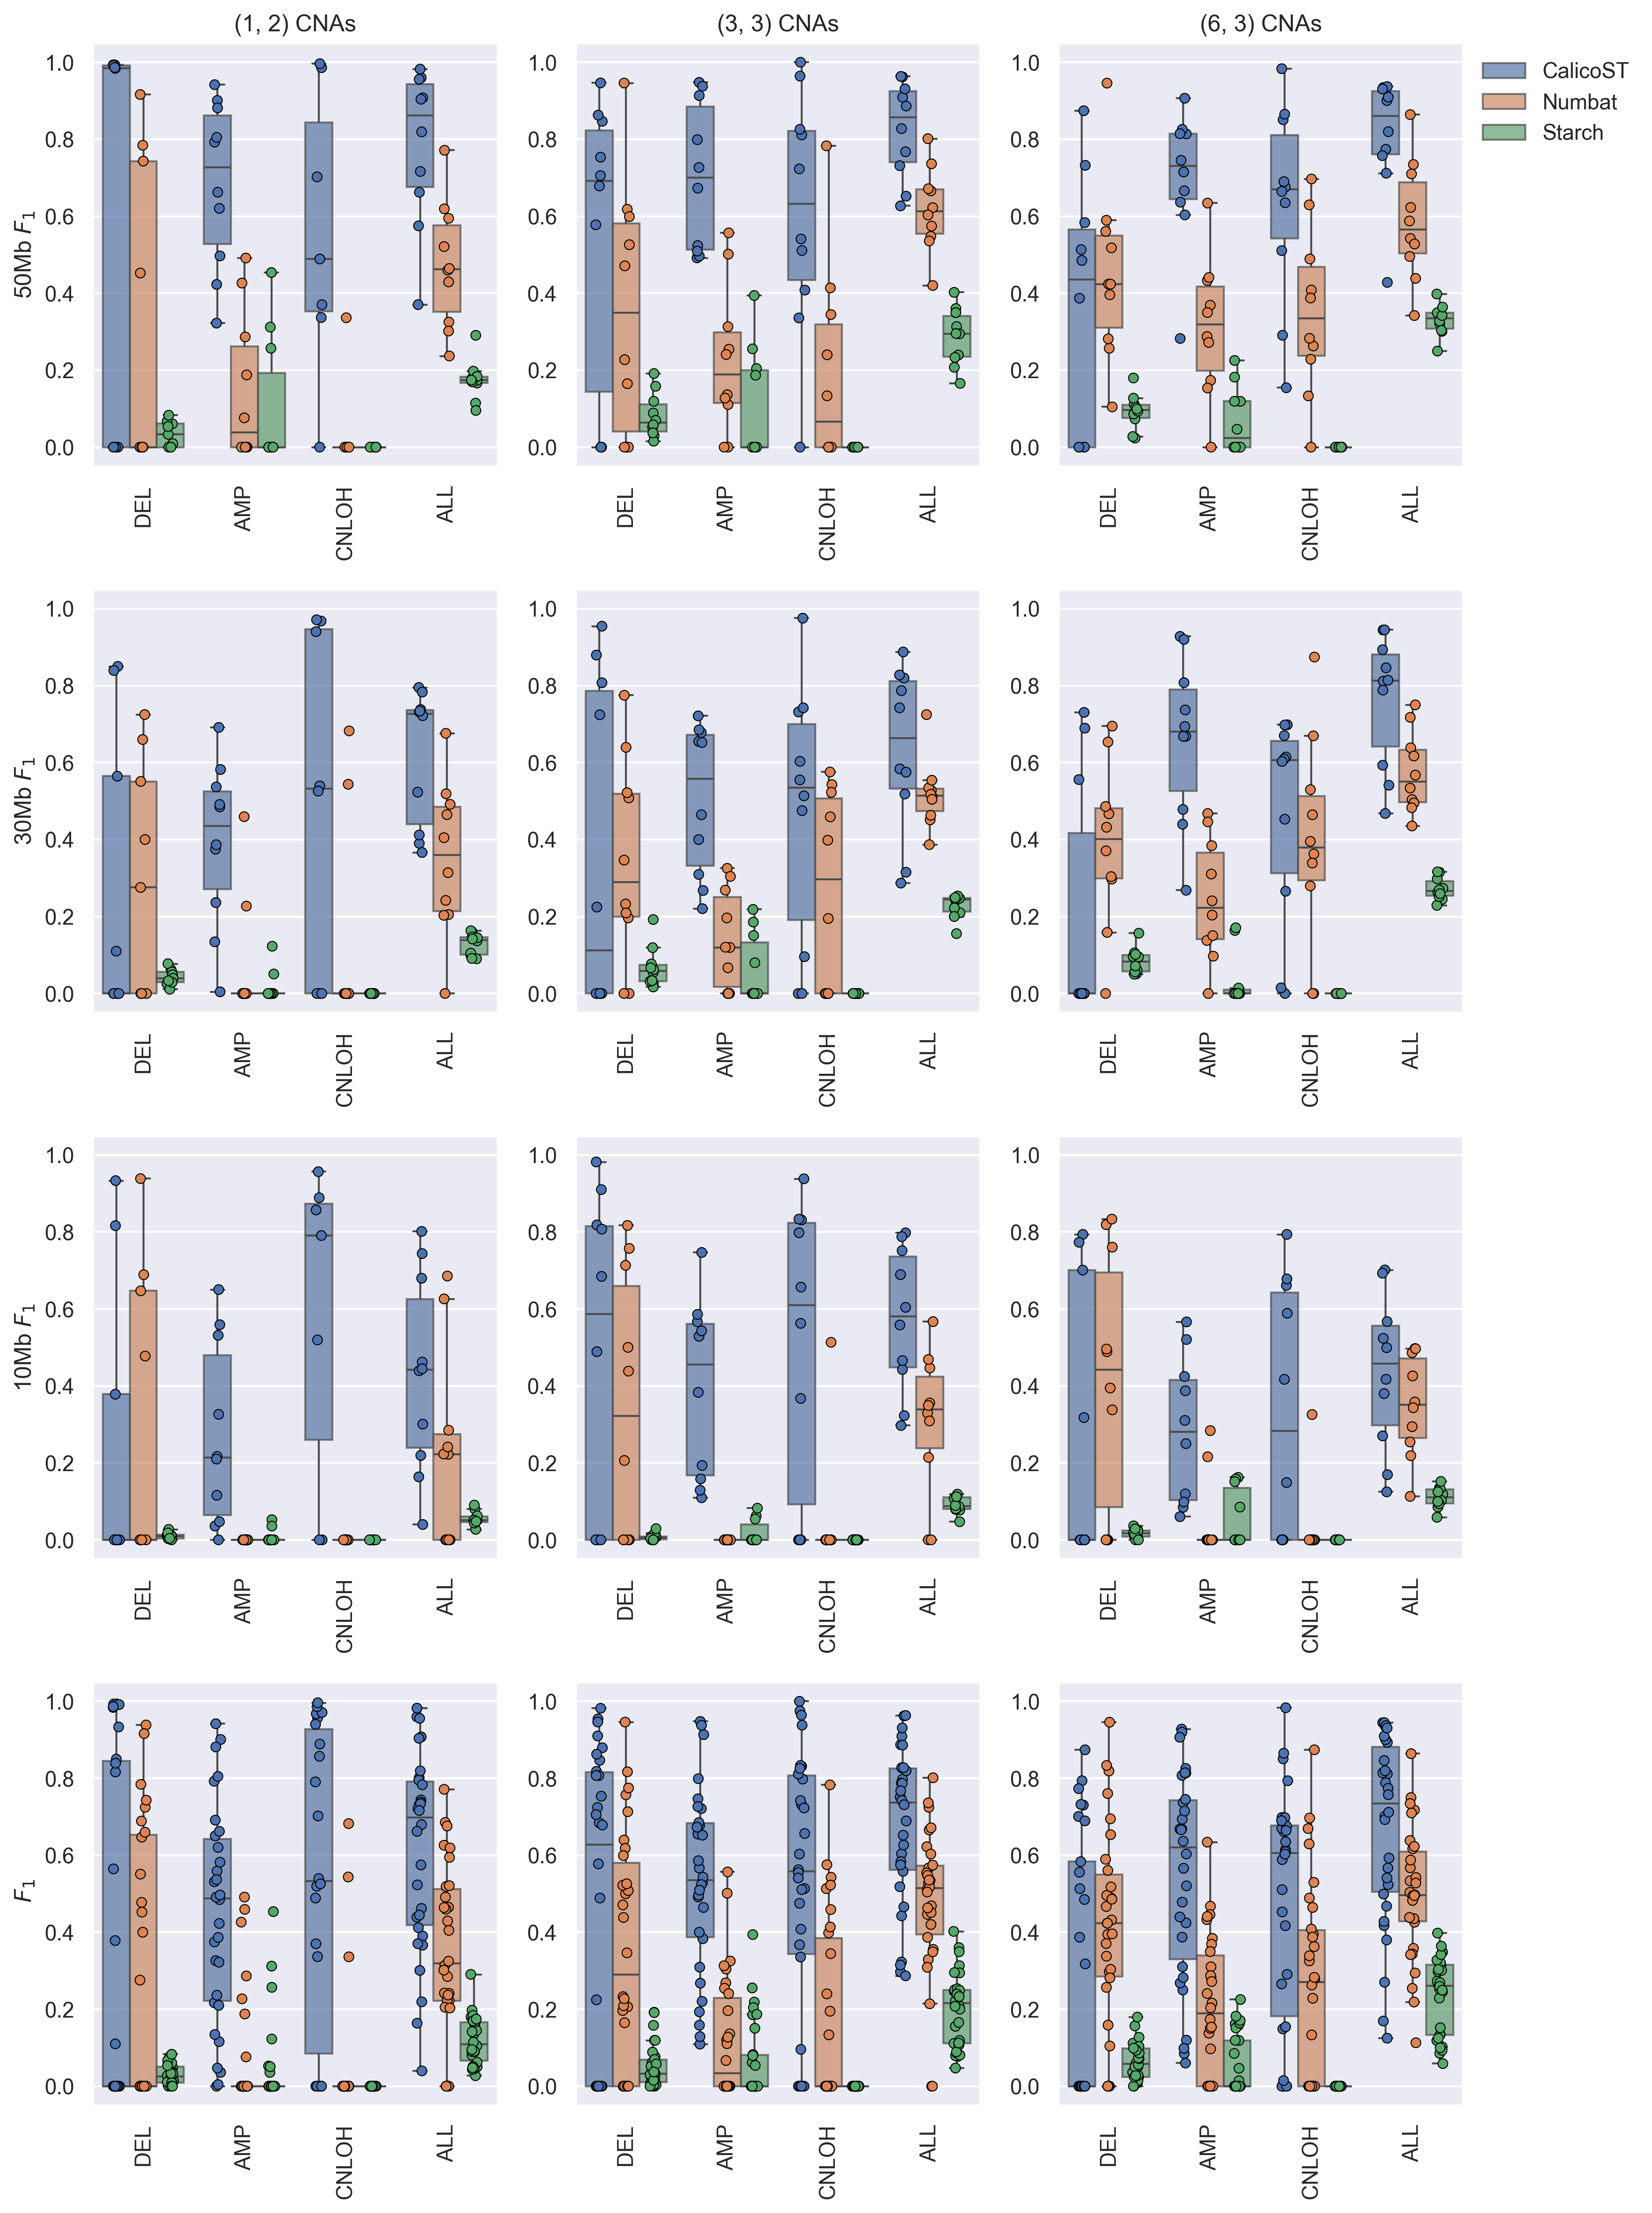

In [20]:
plot_cna_f1s(cna_f1s)

# Done.